<a href="https://colab.research.google.com/github/gimokid/learning-tensor-flow/blob/main/01b_medical_data_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [54]:
# Read in insurance dataset from github
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

In [55]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#Regression problem
**Predict the outcome based on some given inputs**

Dependent variable : charges

Independent variable : age, sex, bmi, etc

In [56]:
# Let's try to one-hot-encode our Dataframe so it's all numbers

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [57]:
# Create X & y valued (features and labesl)
# Create training test sets
# Build Neural Network (sort of like modle 2 abobe)

In [58]:
# Create X & y (Datasets X is the are the features, y is the outcome/dependent
# value)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
#

In [59]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [60]:
# View y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [61]:
# We now need to split the dataset into training & testind sets. Use scikitlearn
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [62]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,True,False,True,False,False,True,False,False
1285,47,24.32,0,True,False,True,False,True,False,False,False
1142,52,24.86,0,True,False,True,False,False,False,True,False
969,39,34.32,5,True,False,True,False,False,False,True,False
486,54,21.47,3,True,False,True,False,False,True,False,False


In [63]:
len(y), len(y_train), len(y_test)

(1338, 1070, 268)

In [64]:
# Build neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9974.4482 - mae: 9974.4482  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7523.3726 - mae: 7523.3726
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7961.5967 - mae: 7961.5967
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7845.3945 - mae: 7845.3945
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7567.3438 - mae: 7567.3438
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7330.7876 - mae: 7330.7876
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7236.1875 - mae: 7236.1875
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7586.1372 - mae: 7586.1372
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7818.9937 - mae: 7818.9937
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7340.4409 - mae: 7340.4409
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7402.5205 - mae: 7402.5205
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [65]:
# Check the resulst of the insurance model on test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8040.6299 - mae: 8040.6299  


[8007.56982421875, 8007.56982421875]

# Improve model
1. Add layer with more hidden units and use Adam optimizer (SGD resulted in errors)
2. Same as above but train for longer
3. Other

In [66]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"]
)
# 3. Fite the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [67]:
# Evaluate the new model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4912.2339 - mae: 4912.2339  


[4771.41357421875, 4771.41357421875]

In [68]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"]
)

# 3. Fite the model for 200 epochs
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [69]:
# Evaluate our 3rd model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3468.5671 - mae: 3468.5671  


[3404.448974609375, 3404.448974609375]

Text(0.5, 0, 'epochs')

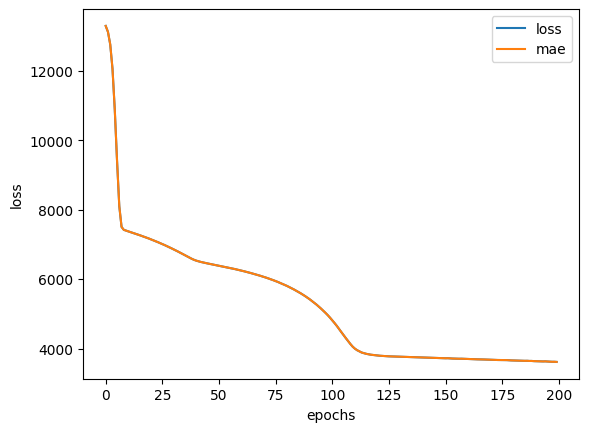

In [70]:
# Plot history. Also known as the training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# How long should you train for?

It depends on the problem you are working on.  Tensorflow has a EarlyStopping Callback: a tensorflow component you can add to stop training once improvement in training has stopped.

In [71]:
from sklearn.utils.validation import validate_data
# Model 4 with early stopping callback

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"]
)

# 3. Define early callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

# 4. Fit the model with the callback option
history = insurance_model_4.fit(X_train, y_train, epochs=500,
                                validation_data=(X_test, y_test),
                                callbacks=[early_stopping],
                                verbose=0
)

Text(0.5, 0, 'epochs')

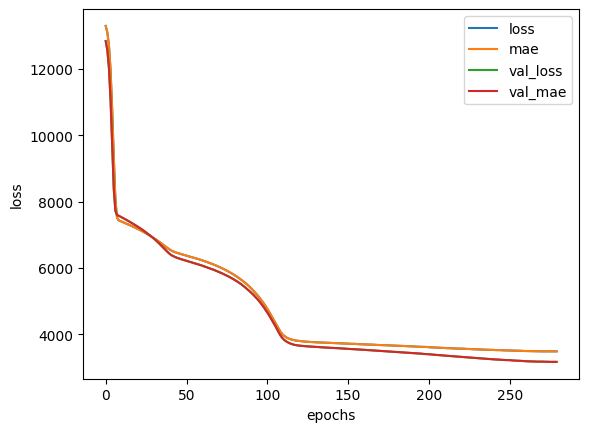

In [72]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [73]:
# Evaluate model 4
insurance_model_4.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3214.8738 - mae: 3214.8738 


[3171.458740234375, 3171.458740234375]

# Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer nomralization.

If you are not sure on which to use, you could try both and see which performs better.

* MinMaxScaler()
* StandardScaler

In [74]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


<Axes: ylabel='Frequency'>

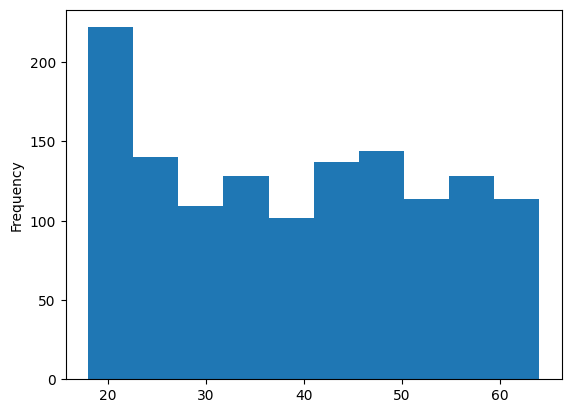

In [75]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

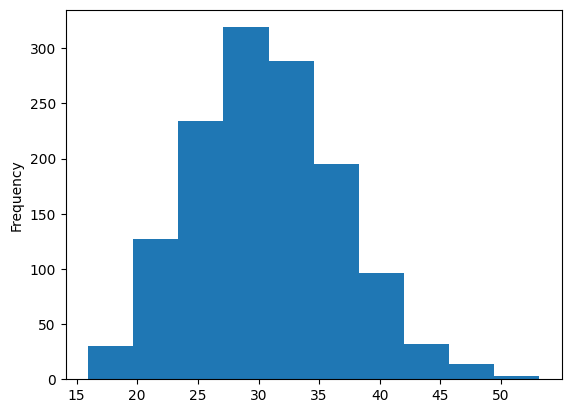

In [76]:
X["bmi"].plot(kind="hist")

In [77]:
X["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [78]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [79]:
# Read in insurance dataset from github
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

In [80]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can use a few classes from Scikit-Learn

In [81]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [82]:
ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [83]:
# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our trand test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column trnasformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler and OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [84]:
# What does our data look like?
X_train.loc[0]


,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [85]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [86]:
# Lets build the model using the normalized data

# Set Random Seed
tf.random.set_seed(42)

# Build the model
insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"]
)

# Define the callback function
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

# Fit the model
history = insurance_model_5.fit(X_train_normal, y_train, epochs=100,
                                validation_data=(X_test_normal, y_test),
                                callbacks=[early_stopping],
                                verbose=0
)



Text(0.5, 0, 'epochs')

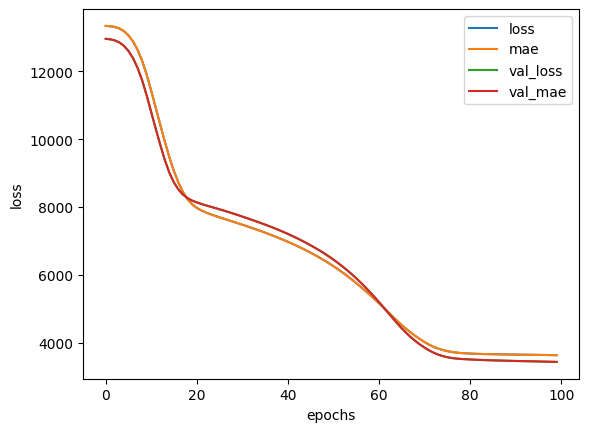

In [87]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [88]:
# Evaluate the model
insurance_model_5.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3513.7764 - mae: 3513.7764 


[3428.31396484375, 3428.31396484375]

In [90]:
insurance_model_2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)

In [91]:
insurance_model_5.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)